In [33]:
library(tidyverse)
library(repr)
library(infer)
library(cowplot)
library(broom)
library(dplyr)
library(knitr)
library(GGally)

# Question and Data

In [34]:
## the dataset can be read from the URL link:
data_sci_job_salaries <- read_csv("https://raw.githubusercontent.com/SimonYYL/STAT-301/main/ds_salaries.csv") %>%
  rename(index = 1)  # Rename the first column to "index"
head(data_sci_job_salaries, 5)

New names:
• `` -> `...1`
Rows: 607 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (7): experience_level, employment_type, job_title, salary_currency, empl...
dbl (5): ...1, work_year, salary, salary_in_usd, remote_ratio

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


index,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


## Introduction <br>
This dataset provides a comprehensive overview of salaries within the data science profession across various dimensions. <br>
It comprises data from multiple years, reflecting salaries for different roles such as Data Scientists, Machine Learning Engineers, and others within the field. Key attributes include the year of the salary report, the experience level of the professionals, types of employment (full-time, part-time, etc.), job titles, and the salaries both in local currency and in USD for standardization. Additional information about the employees, such as their country of residence, the remote work ratio, along with the location and size of the employing companies, is also included. <br> 
The dataset was provided by Instructor Lasantha Premarathna and obtained from the following webpage link: https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries/data.
### Summary of dataset: <br>
Table shows the variables name, their data type, number of unique values and descriptions <br>
The table indicates that the variables in this dataset are categorical, ordinal, and numerical. The majority of them are categorical and ordinal, which could impact the selection of the most suitable algorithm for accurately fitting the dataset.
| Variable Name       | Data Type | Unique Values | Example Values    | Description                                                                 |
|---------------------|-----------|---------------|-------------------|-----------------------------------------------------------------------------|
| `Unnamed: index`       | `dbl`   | 607           | 0                 | An integer index, likely an artifact and not analytically valuable.         |
| `work_year`        | `dbl`   | 3             | 2020              | The year the salary was reported, indicating data spans 3 different years.  |
| `experience_level` | `chr`  | 4             | MI                | The experience level of the employee (e.g., 'MI' for Mid-level).            |
| `employment_type`  | `chr`  | 4             | FT                | The type of employment (e.g., 'FT' for Full Time).                          |
| `job_title`        | `chr`  | 50            | Data Scientist    | The job title within the data science field.                                |
| `salary`           | `dbl`   | 272           | 70000             | The salary in the employee's local currency.                                |
| `salary_currency`  | `chr`  | 17            | EUR               | The currency code of the salary.                                            |
| `salary_in_usd`    | `dbl`   | 369           | 79833             | The salary converted to USD for comparison.                                 |
| `employee_residence` | `chr`  | 57            | DE                | The country code of the employee's residence.                               |
| `remote_ratio`     | `dbl`   | 3             | 0                 | The percentage of work done remotely (0, 50, 100).                          |
| `company_location` | `chr`  | 50            | DE                | The country code of the company's location.                                 |
| `company_size`     | `chr`  | 3             | L                 | The size of the company ('S' for Small, 'M' for Medium, 'L' for Large).     |


In [35]:
# Number of observations
num_obs <- nrow(data_sci_job_salaries)

# Number of variables
num_vars <- ncol(data_sci_job_salaries)

# Names of variables
var_names <- colnames(data_sci_job_salaries)

# Types of variables
var_types <- sapply(data_sci_job_salaries, class)

# Create a data frame to hold the information
info_df <- data.frame(Variable = var_names, Type = var_types)

# Add the number of observations and variables at the top
info_df <- rbind(data.frame(Variable = c("Number of observations", "Number of variables"), 
                            Type = c(num_obs, num_vars)), 
                 info_df)
table_1 <-kable(info_df,"markdown",caption = "Exploratory data analysis table")
table_1

# Get the number of unique values for each variable
num_unique <- sapply(data_sci_job_salaries, function(x) length(unique(x)))

# Create a data frame to hold the information
unique_df <- data.frame(Unique_Values = num_unique)
table_2 <- kable(unique_df, "markdown", caption = "Unique number of values for each variable")
table_2



Table: Exploratory data analysis table

|                   |Variable               |Type      |
|:------------------|:----------------------|:---------|
|1                  |Number of observations |607       |
|2                  |Number of variables    |12        |
|index              |index                  |numeric   |
|work_year          |work_year              |numeric   |
|experience_level   |experience_level       |character |
|employment_type    |employment_type        |character |
|job_title          |job_title              |character |
|salary             |salary                 |numeric   |
|salary_currency    |salary_currency        |character |
|salary_in_usd      |salary_in_usd          |numeric   |
|employee_residence |employee_residence     |character |
|remote_ratio       |remote_ratio           |numeric   |
|company_location   |company_location       |character |
|company_size       |company_size           |character |



Table: Unique number of values for each variable

|                   | Unique_Values|
|:------------------|-------------:|
|index              |           607|
|work_year          |             3|
|experience_level   |             4|
|employment_type    |             4|
|job_title          |            50|
|salary             |           272|
|salary_currency    |            17|
|salary_in_usd      |           369|
|employee_residence |            57|
|remote_ratio       |             3|
|company_location   |            50|
|company_size       |             3|

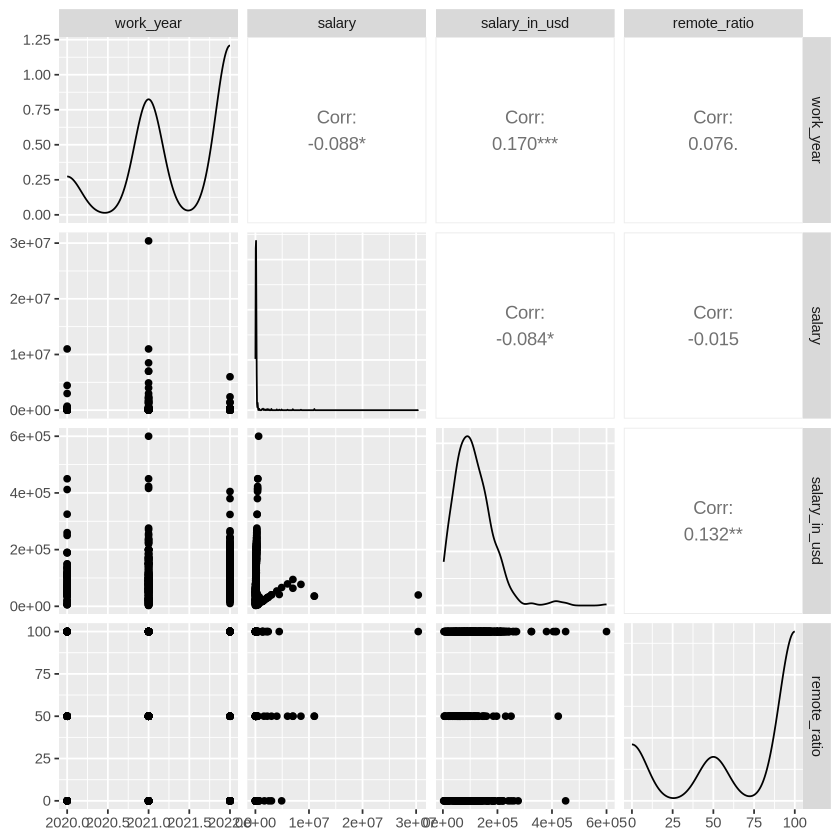

In [36]:
# Load necessary libraries
library(dplyr)
library(GGally)

# Create a new data frame that only includes integer variables
numeric_df <- data_sci_job_salaries %>% select_if(is.numeric)
salaries_pair <- numeric_df %>% select(-index) %>% ggpairs()
salaries_pair

### Summary of Statsic of each numeric columns <br>
This table provides an overview of the distribution of numeric data, including salary and salary in USD, among other variables. The infomation included mean, max, min, lower quartile, upper quartile, and null value count for each variable (column). 

In [37]:
summary_df_without_index <-numeric_df %>% select(-index)
summary_df <- data.frame(
  Mean = sapply(summary_df_without_index, mean, na.rm = TRUE),
  Max = sapply(summary_df_without_index, max, na.rm = TRUE),
  Min = sapply(summary_df_without_index, min, na.rm = TRUE),
  Lower_Quartile = sapply(summary_df_without_index, function(x) quantile(x, 0.25, na.rm = TRUE)),
  Upper_Quartile = sapply(summary_df_without_index, function(x) quantile(x, 0.75, na.rm = TRUE)),
  NA_Count = sapply(summary_df_without_index, function(x) sum(is.na(x)))
)
# Print the summary dataframe
summary_df

,Mean,Max,Min,Lower_Quartile,Upper_Quartile,NA_Count
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
work_year,2021.40527,2022,2020,2021,2022,0
salary,324000.06260,30400000,4000,70000,165000,0
salary_in_usd,112297.86985,600000,2859,62726,150000,0
remote_ratio,70.92257,100,0,50,100,0


## Question
**How do experience level, remote work ratio, company size, and the location of the employee affect the salary of data science professionals in USD?** <br>
### Description:
This question seeks to explore the combined effect of several factors on the salaries of data science professionals: their experience level (experience_level), the proportion of remote work (remote_ratio), the size of the company they work for (company_size), and their geographical location (employee_residence). The primary variable of interest remains the salary in USD (salary_in_usd). By including multiple explanatory variables, we aim to capture a more nuanced view of what influences data science salaries, considering not just individual attributes but also the organizational and geographical context.

### Data Utilization:
The dataset provides a rich set of variables that allow for a comprehensive analysis using data science model. By including variables related to professional experience, work modality, organizational characteristics, and geographical factors, the model can offer a multifaceted understanding of salary determinants in the data science field. This approach will enable us to assess the relative impact of each factor on salary and how they interact with each other.

### Focus:
The focus extends to both **prediction** and **inference**:

**Prediction**: With a multi-linear regression model, we can predict data science salaries based on a combination of experience level, remote work ratio, company size, and employee location. This predictive capability can be particularly useful for job seekers and employers in setting competitive and fair salary standards. <br>
**Inference**: The model will provide insights into how significant each factor is in determining salaries and the nature of their relationships. It will help in understanding if certain factors have a stronger influence on salaries and how these factors may interact, contributing to the broader discourse on compensation equity and market dynamics in the data science domain. <br>
Incorporating multiple variables into the question not only enriches the analysis but also aligns with the objective of using multi-linear regression, offering a more detailed and holistic view of the factors that influence data science salaries.